### 코렙에서 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


### 초기화

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install mglearn

     |████████████████████████████████| 540 kB 7.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=4b78906ddca843ccfa2b86bf35dbf81b8c9b409d27ccb4b77d995757bb60fbfe
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn




```
# Windows 한글
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```



#### 지도학습과 비지도학습 차이 회고

- 지도학습 : 타겟값을 알고 있는 데이터를 이용해 새로운 객체의 타겟 변수값을 예측할 수 있는 패턴을 찾아내는 것

- 비지도학습 : 타겟 변수에 신경쓰지 않고 데이터 집합에 있는 어떤 규칙성을 찾으려는 것

# 군집(clustering)

- 데이터에서 자연스럽게 분류되는 그룹을 찾아내는 개념
- 데이터셋을 비슷한 것끼리 클러스터(cluster)라는 그룹으로 나눔
- 분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어느 클러스터에 속하는지 할당(또는 예측)


군집(clustering) 알고리즘 종류

- K 평균 군집(K-means)
- 계층형 군집 : 병합적, 분할적
- DBSCAN

## k-평균 군집 (K-means)

- 주어진 데이터를 K개의 클러스터(cluster)로 묶는 알고리즘
- 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾음

- K-means 에서 평균은 중점이며, 군집(cluster)에 들어 있는 객체들은 각 차원별로 산술 평균값으로 표현
 - 일반적으로 중점은 군집에 있는 모든 사례가 가진 특징의 평균값

- K-means 에서 K는 데이터에서 찾아내려는 군집 수
 - 원하는 군집의 개수로 시작
 - 각 군집이 자신의 중점에 가까운 점들을 갖도록 군집의 중점을 다시 계산
 - 이 기법을 최근접 이웃 군집화라고 부르기도 함

K-means 단계

1. 클러스터(cluster)의 개수 K값 설정

2. 클러스터마다 초기 중심 설정(초기 중심은 각 학습 데이터가 자신이 속한 클러스터를 결정하는데 기준점)

3. 모든 데이터는 k개의 초기 중심까지 거리를 계산하고 가장 가까이에 있는 중심을 자기 클러스터의 중심이라 판단

4. 클러스터가 정해지면 각 클러스터의 평균(중심)을 구해 이를 새로운 중심으로 정함

5. 학습이 진행되면서 각 클러스터마다 최적의 중심으로 이동(중심 재계산)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


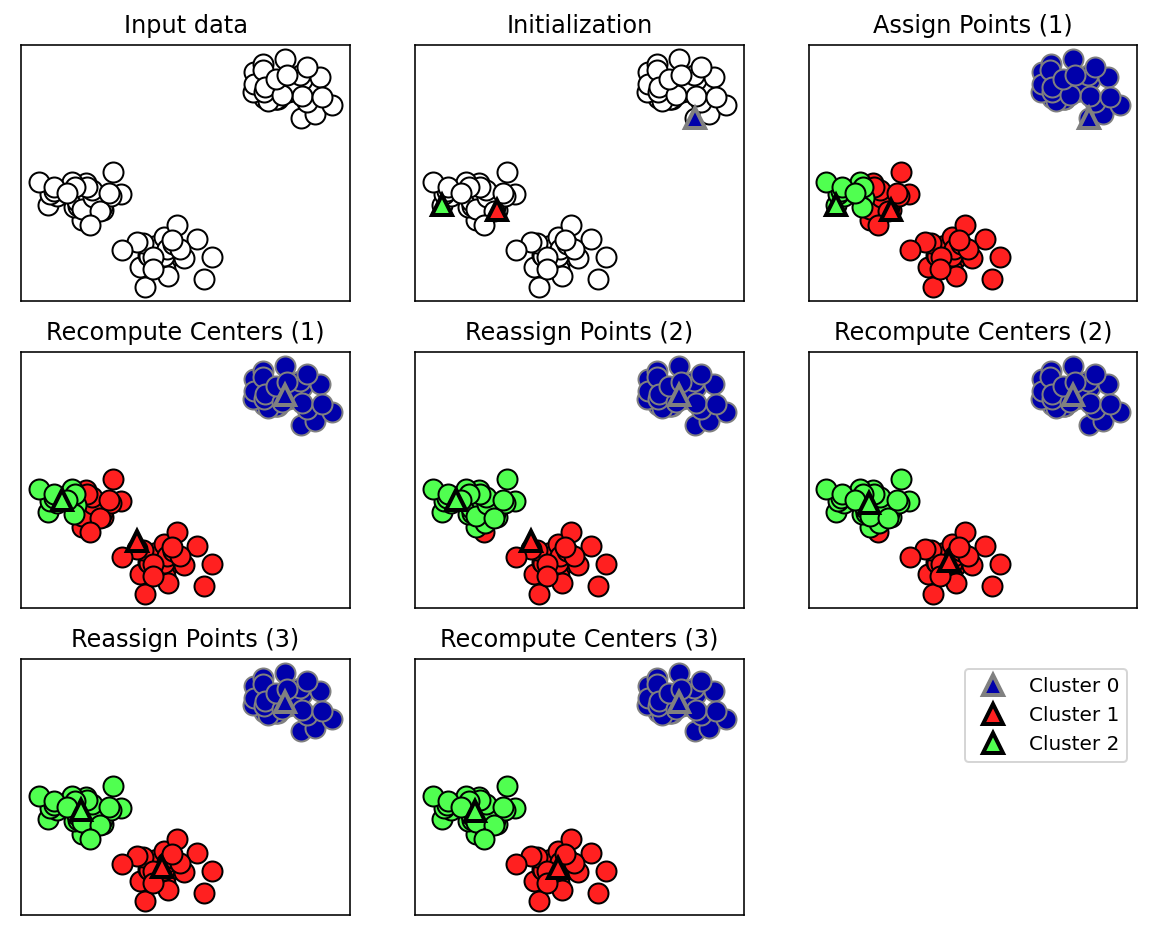

In [5]:
# K-means 알고리즘 과정(단계)
mglearn.plots.plot_kmeans_algorithm()

- 입력 데이터(Input data) : 삼각형은 클러스터 중심, 원은 데이터 포인트, 클러스터는 색으로 구분
- 초기화(Initialization) : 클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화
- 반복 : 클러스터 중심에 할당되는 포인트에 변화가 없을 때까지 반복
  - 포인트 할당(Assign Points) : 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
  - 중심 재계산(Recompute Centers) : 할당한 포인트의 평균값으로 클러스터 중심을 갱신


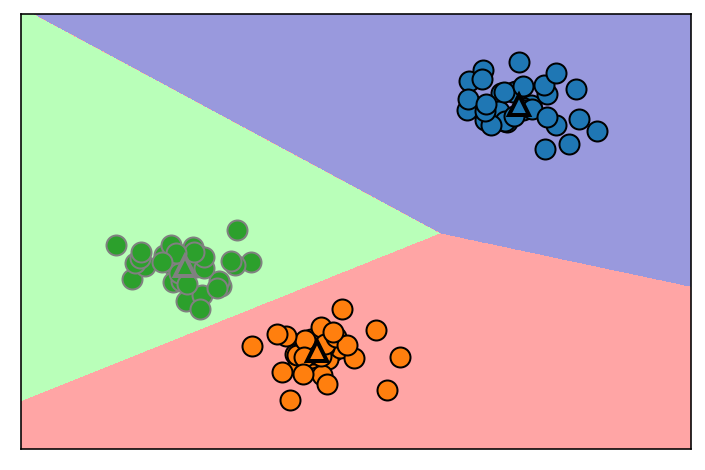

In [6]:
# K-means 알고리즘으로 찾은 클러스터 중심과 경계
mglearn.plots.plot_kmeans_boundaries()

[KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
```
KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```
Parameters:
- n_clusters : 군집화할 개수(군집 중심점의 개수를 의미)
- init : 군집 중심점의 좌표를 설정하는 방식
- max_iter : 최대 반복 횟수, 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

Attributes:
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 ([군집 개수, 피처 개수] 모양으로 구성). 군집 중심점 좌표 시각화에 이용가능.

#### 군집(clustering) 실습 01

임의의 데이터로 K-means를 이용해 군집화 실습


In [7]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 군집 모델
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [8]:
# 클러스터 레이블
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [9]:
# 새로운 데이터의 클러스터 레이블을 예측
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

- 기존 훈련세트에 대해 predict를 실행하면 labels_와 같은 값을 얻게됨
- 각 데이터 포인트가 레이블(결과값)을 가진다는 면에서 분류와 조금 비슷
- 그러나 정답을 모르고 있으며 레이블 자체에 어떤 의미가 있지는 않음

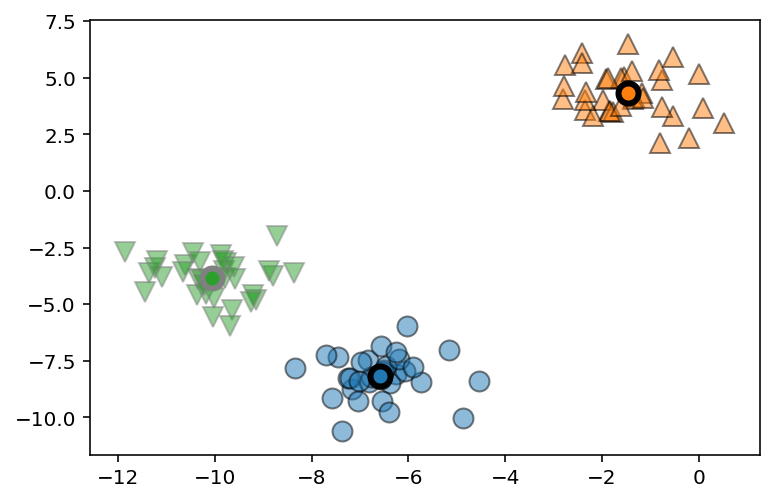

In [10]:
# 클러스터 중심을 시각화
kmeans.cluster_centers_

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, alpha=0.5)

xcenter = kmeans.cluster_centers_[:, 0]
ycenter = kmeans.cluster_centers_[:, 1]
mglearn.discrete_scatter(xcenter, ycenter, [0, 1, 2], markers='o', markeredgewidth=3)
plt.show()

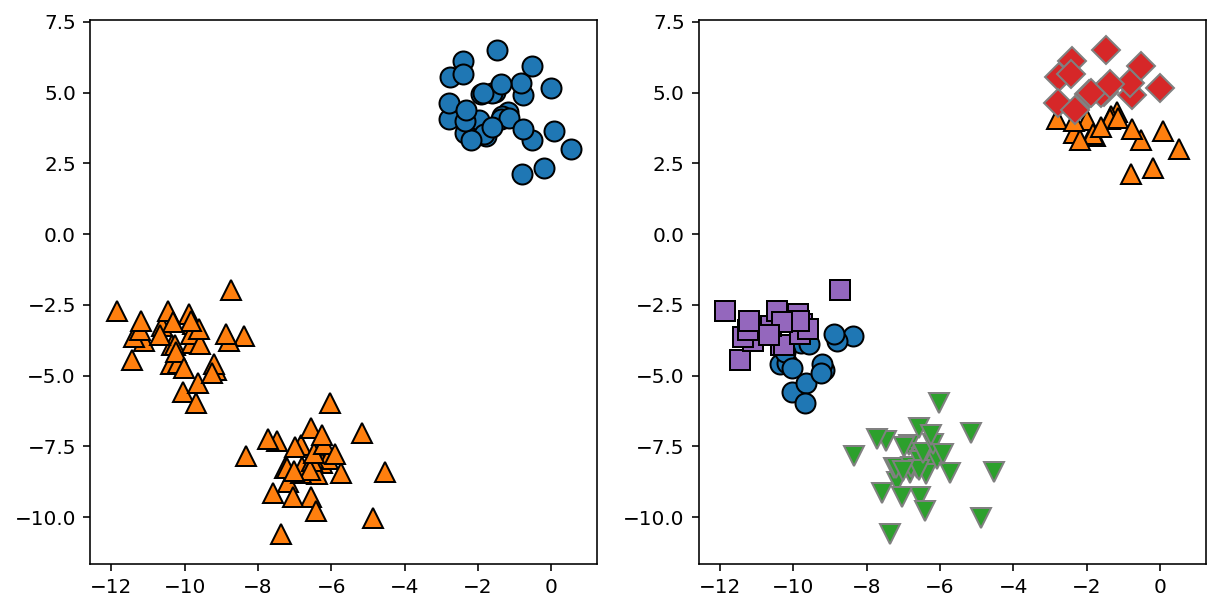

In [11]:
# 클러스터 수를 조정
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans2.labels_, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans5.fit(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans5.labels_, ax=axes[1])
plt.show()

#### 군집(clustering) 실습 02-1

Iris 데이터 k-means 군집화 실습


In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
# kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# 실제 붓꽃 품종 분류와 차이를 확인
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [16]:
df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

In [17]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

df['pca_component_1'] = X_pca[:, 0]
df['pca_component_2'] = X_pca[:, 1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_component_1,pca_component_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


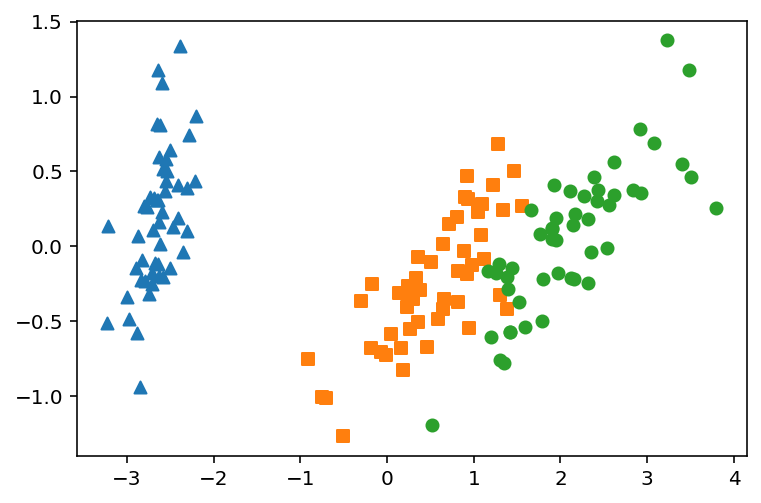

In [18]:
# 각 cluster 별 산점도 
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[ df['target'] == i ]['pca_component_1']
  y_data = df[ df['target'] == i ]['pca_component_2']
  plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.show()

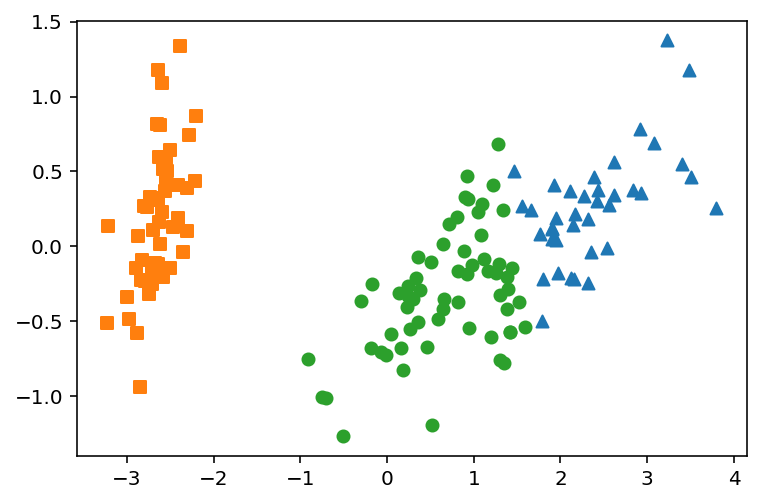

In [19]:
markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
  x_data = df[ df['cluster'] == i ]['pca_component_1']
  y_data = df[ df['cluster'] == i ]['pca_component_2']
  plt.scatter(x_data, y_data, marker=marker)

plt.show()

#### 군집(clustering) 실습 02-2

손글씨 데이터를 이용해서 KMeans 군집화

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()

df = pd.DataFrame( digits.data )
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [23]:
# kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit( df )
kmeans.labels_

array([5, 9, 9, ..., 9, 4, 4], dtype=int32)

In [24]:
df['target'] = digits.target
df['cluster'] = kmeans.labels_
df.groupby(['target', 'cluster'])[0].count()

target  cluster
0       0            1
        5          177
1       1            1
        2           55
        3           24
        7            2
        8            1
        9           99
2       1           13
        2            2
        3          148
        4            2
        5            1
        6            3
        9            8
3       1          155
        3            1
        4           11
        6            7
        8            2
        9            7
4       0          163
        2            7
        6            7
        9            4
5       0            2
        1            1
        4           42
        7            1
        8          136
6       2            1
        5            1
        7          177
        9            2
7       6          177
        9            2
8       1            4
        2            6
        3            3
        4           48
        6            5
        7            2
        8         

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform( digits.data )

df['pca_component_1'] = X_pca[:, 0]
df['pca_component_2'] = X_pca[:, 1]
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target,cluster,pca_component_1,pca_component_2
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,5,-1.259475,21.274881
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,9,7.957628,-20.768691
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,9,6.991925,-9.955988


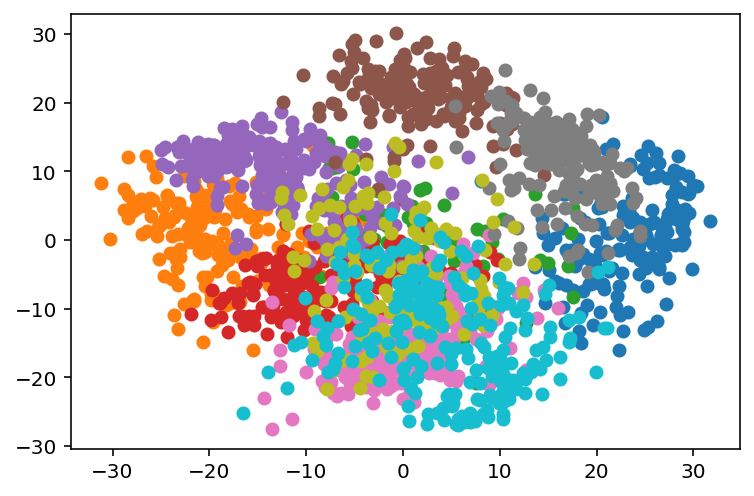

In [26]:
# 각 cluster 별 산점도 
for i in range( len(digits.target_names) ):
  x_data = df[ df['cluster'] == i ]['pca_component_1']
  y_data = df[ df['cluster'] == i ]['pca_component_2']
  plt.scatter(x_data, y_data)

plt.show()

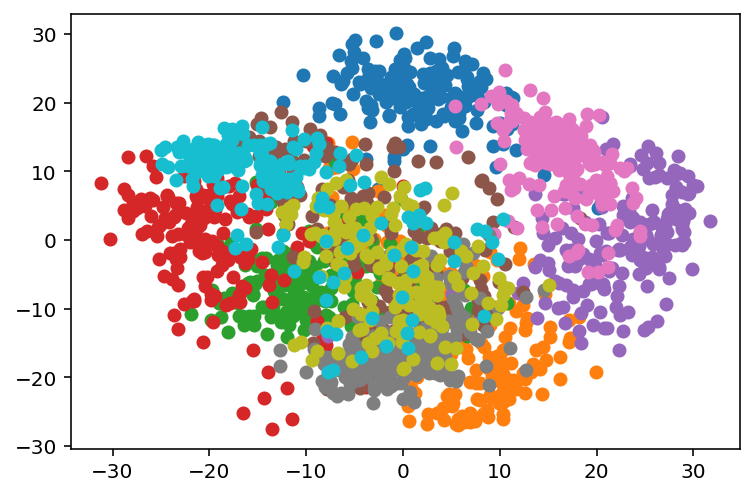

In [27]:
for i in range( len(digits.target_names) ):
  x_data = df[ df['target'] == i ]['pca_component_1']
  y_data = df[ df['target'] == i ]['pca_component_2']
  plt.scatter(x_data, y_data)

plt.show()

#### K-means 알고리즘의 한계

- 클러스터 k를 직접 지정해줘야 하며, k의 값에 따라 결과 값이 완전히 달라질 수 있음
- 평균으로 계산하기 때문에 이상치에 민감
- 구형이 아닌 클러스터의 모양에는 적합치 않음
 - 클러스터의 중심으로부터의 거리를 측정하는 방식이기 때문


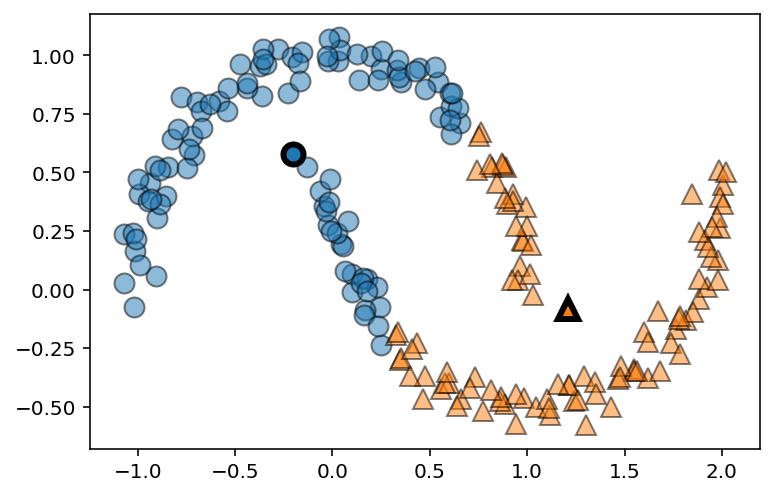

In [28]:
# two_moons 데이터를 생성
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# 클러스터 할당과 클러스터 중심을 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, alpha=0.5)
xcenter = kmeans.cluster_centers_[:, 0]
ycenter = kmeans.cluster_centers_[:, 1]
mglearn.discrete_scatter(xcenter, ycenter, [0, 1], markeredgewidth=3)
plt.show()

## 병합적 군집(agglomerative clustering) 

- 유사한 특성을 지닌 데이터를 그리디(greedy)하게 묶어 이진 트리 형태로 만들어가는 방법
> *greedy : 현재 수준에서 주어진 조건을 가장 만족하는 후보자를 선택하는 정책

- 시작할 때 각 포인트를 하나의 클러스터로 지정하고 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클래스를 합침

- 계층적 군집의 한 종류





병합 군집(agglomerative clustering) 단계

1. 모든 데이터를 단일 클러스터로 정의
2. 각 클러스터 간 유사성을 계산
3. 유사성이 가장 높은 두 개의 클러스터를 합침
4. 2, 3단계를 클러스터가 1개가 될 때까지 반복


계층형 군집(Hierarchical Clustering)

- 계층적 트리 모형을 이용하여 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘

- 계층형 군집 2가지
 - 병합적 군집(agglomerative clustering) : 상향식 군집
 - 분할적 군집(divisive clustering) : 하향식 군집

[AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)
```
AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
```
Parameters :
- n_clusters : 군집화할 개수
- linkage : 유사성을 측정하는 방법 지정
 - ward(기본값) : 분산을 가장 작게 증가 시키는 두 클러스터를 합침 (크기가 비슷한 클러스터가 생성)
 - average : 평균 거리가 가장 짧은 두 클러스터를 합침
 - complete : 최대 거리가 가장 짧은 두 클러스터를 합침
 - single : 클러스터 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합침 (scikit-learn 0.20 추가)


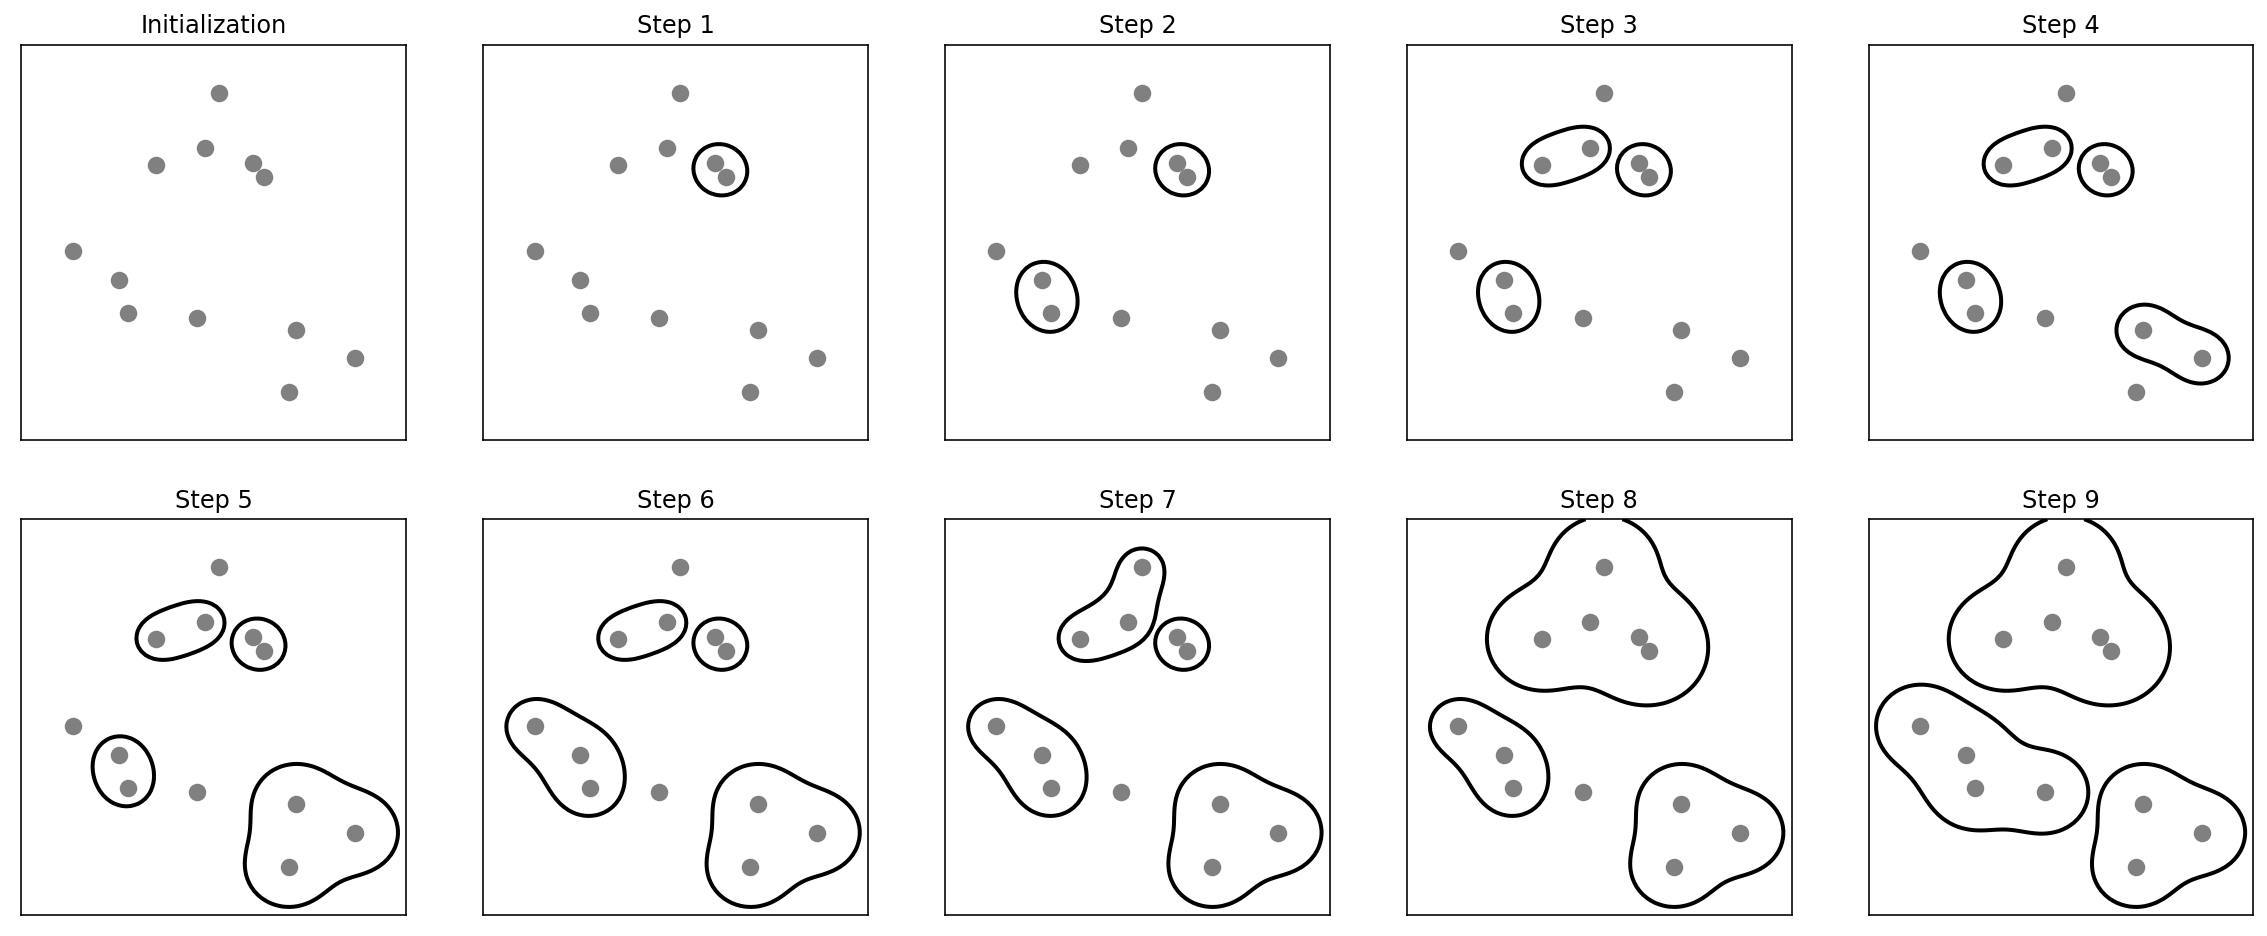

In [29]:
# 두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집 과정(단계)
mglearn.plots.plot_agglomerative_algorithm()

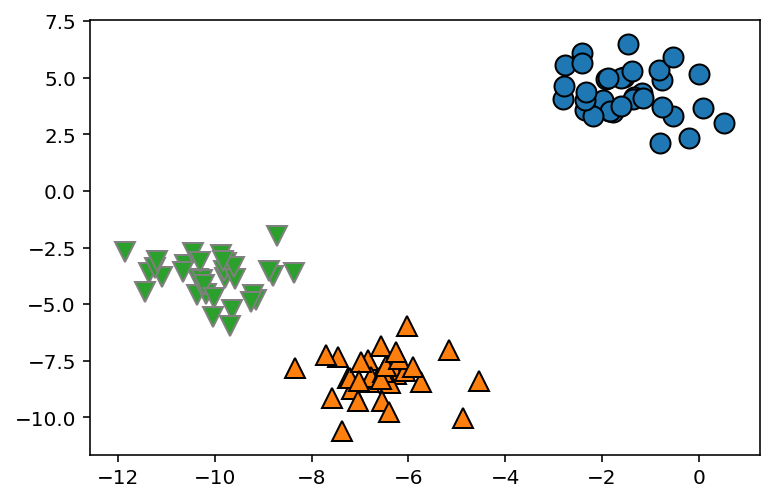

In [31]:
# 병합 군집을 사용한 클러스터 할당(예측)
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], agg.labels_)
plt.show()

덴드로그램 (dendrogram)
- 계층 군집을 시각화하는 도구인 덴드로그램은 다차원 데이터셋을 처리할 수 있음
- SciPy모듈 이용


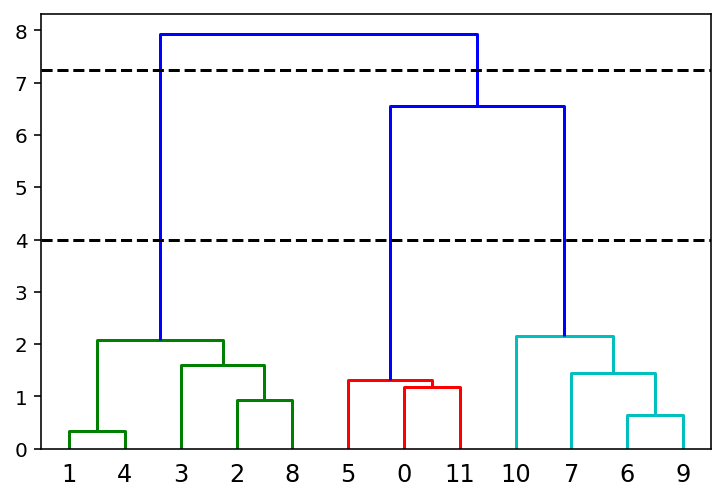

In [33]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 X 에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_array = ward(X)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램으로 시각화
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
plt.plot(bounds, [7.25, 7.25], '--', c='k') # 2개 클러스터
plt.plot(bounds, [4, 4], '--', c='k') # 3개 클러스터
plt.show()

- y축의 길이는 클러스터가 얼마나 멀리 떨어져 있는지를 나타냄

#### 군집(clustering) 실습 03-1

iris데이터를 활용한 병합 군집


In [34]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [35]:
# AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit( df )

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


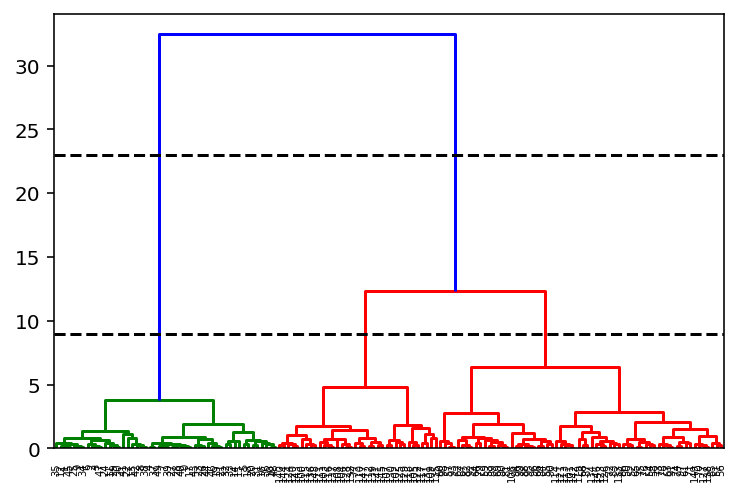

In [37]:
# 덴드로그램으로 시각화
from scipy.cluster.hierarchy import dendrogram, ward

# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 리턴
linkage_array = ward(df)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램으로 시각화
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
plt.plot(bounds, [23, 23], '--', c='k') # 2개 클러스터
plt.plot(bounds, [9, 9], '--', c='k') # 3개 클러스터
plt.show()

In [40]:
# 2차원 평면으로 군집 시각화 (차원축소이용)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform( iris.data )

df['target'] = iris.target
df['cluster'] = agg.labels_
df['pca_component_1'] = X_pca[:, 0]
df['pca_component_2'] = X_pca[:, 1]
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_component_1,pca_component_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397


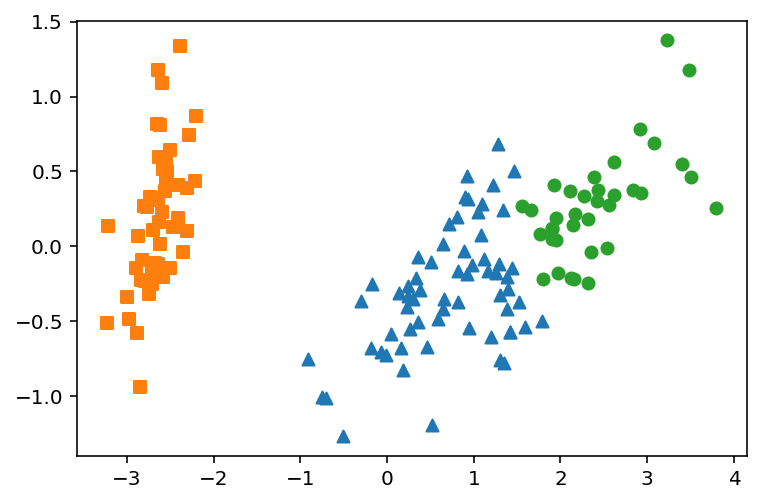

In [45]:
# 각 cluster 별 산점도 
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[df['cluster'] == i]['pca_component_1']
  y_data = df[df['cluster'] == i]['pca_component_2']
  plt.scatter(x_data, y_data, marker=marker)
plt.show()

#### 군집(clustering) 실습 03-2

구형이 아닌 클러스터의 모양 데이터를 활용한 병합 군집

In [46]:
from sklearn.cluster import AgglomerativeClustering

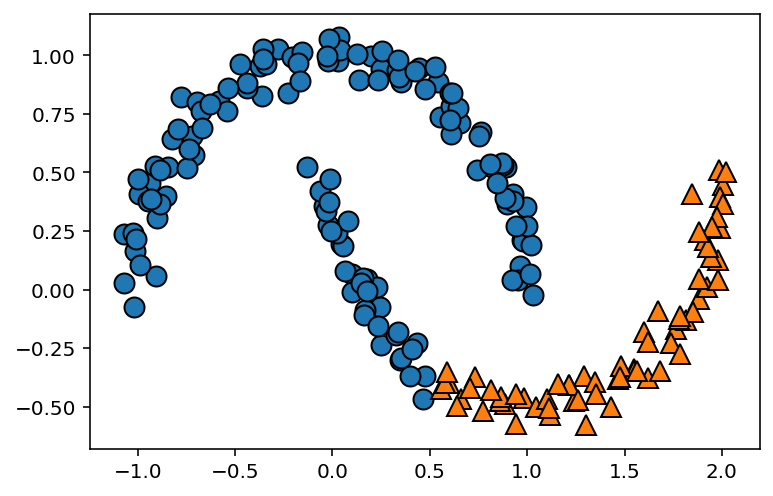

In [47]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], agg.labels_)
plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- 밀도 기반 군집화의 대표적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 함 
- 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행
- 밀도 있게 연결돼 있는(density-connected) 데이터 집합은 동일한 클러스터라고 판단




DBSCAN 데이터 포인트 정의

- 핵심 포인트(Core Point) : 주변영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우

- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터

- 경계 포인트(Border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터

- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

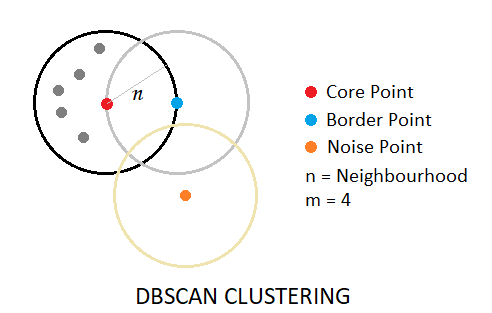

DBSCAN 군집화 과정

1. 어떤 학습데이터가 코어로 정의되면 주변의 이웃 점들을 차례로 방문하면서 각 점들이 코어인지 아닌지 판단
2. 코어이면 앞서 진행했던 방법과 마찬가지로 재귀적으로 반복하고 경계이면 진행을 중단
3. 중단되면 학습 데이터 세트에 있는 다음 점으로 다시 시작
 - 새로 시작할 때는 새로운 클러스터 레이블을 갖음


DBSCAN 장단점

- 클러스터의 개수를 미리 지정할 필요가 없음
- 복잡한 형상이나, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있음(Noise)
- 병합 군집이나 K-means 보다 느리지만 비교적 큰 데이터셋에도 적용 가능

[DBSCAN()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
```
DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
```
Parameters :
- eps : 핵심 샘플 거리(반지름)
- min_samples : 클러스터내의 최소 데이터 개수
 - 1일 경우 모든 점이 클러스터가 됨
 - 2보다 작을 경우 : single link 계산법으로 구한 계층적 군집 방법과 같아지므로 적어도 3은 되어야 함



min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


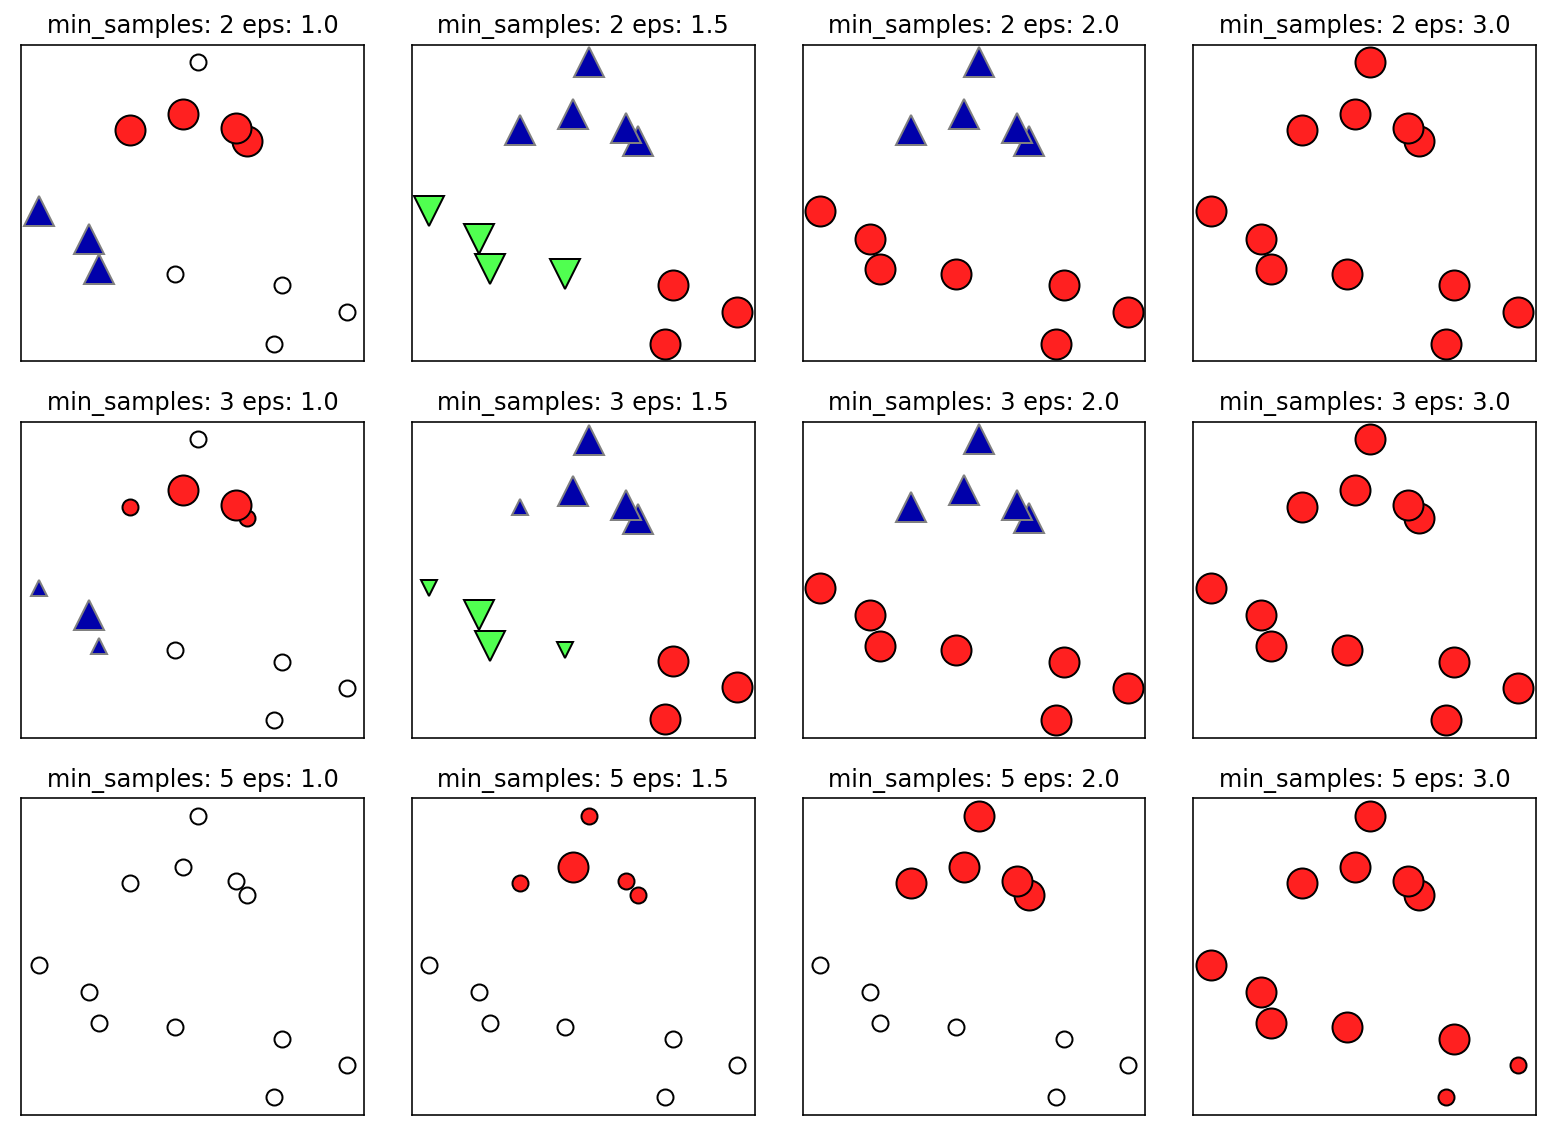

In [48]:
# min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당(예측)
mglearn.plots.plot_dbscan()

- min_sample를 키우면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어남

- eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함
 - 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만듦
 - DBSCAN은 클러스터의 개수를 지정할 필요가 없지만 eps의 값은 간접적으로 몇 개의 클러스터가 만들어질지 제어 가능

#### 군집(clustering) 실습 04

구형이 아닌 클러스터의 모양에 DBSCAN 적용


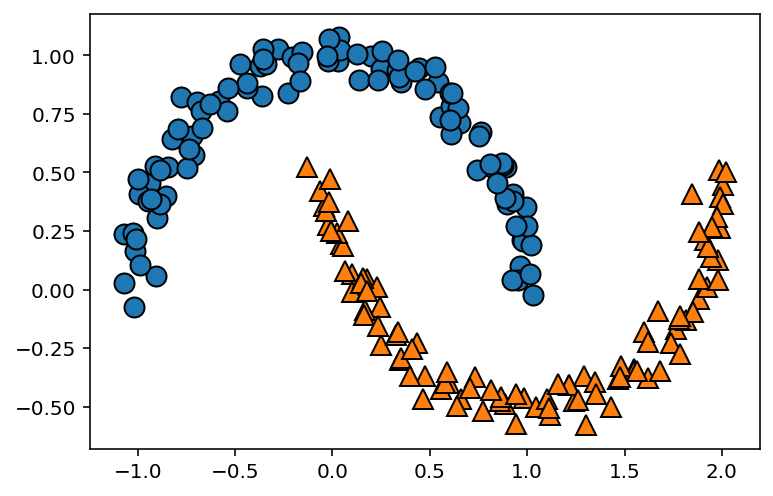

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 두 개의 클러스터로 데이터에 DBSCAN 알고리즘을 적용
# default eps=0.5
dbscan = DBSCAN()
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], dbscan.labels_)
plt.show()

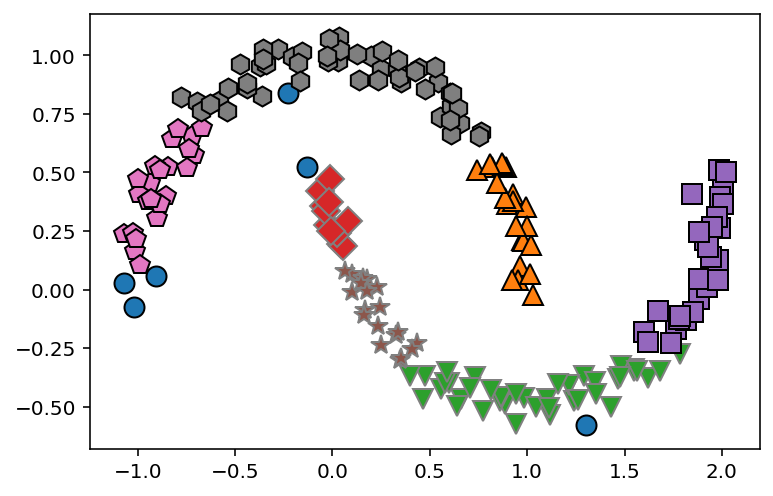

In [50]:
# DBSCAN(eps=0.2)
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], dbscan.labels_)
plt.show()

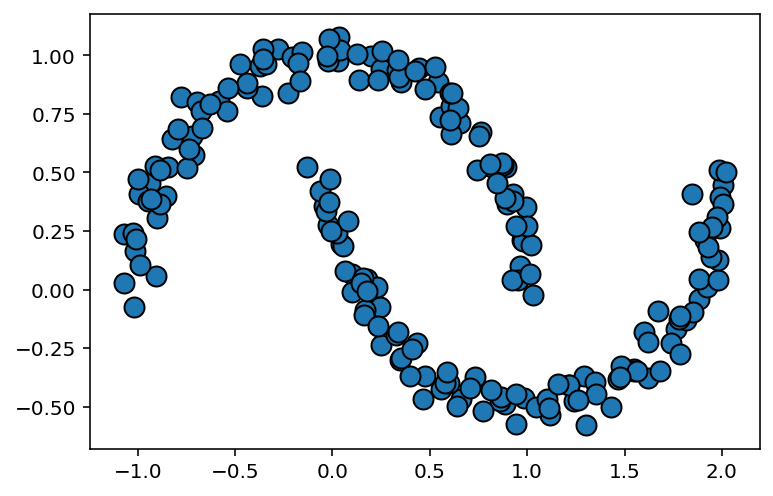

In [51]:
# DBSCAN(eps=0.7)
dbscan = DBSCAN(eps=0.7)
dbscan.fit(X_scaled)

# 클러스터 할당을 표시
mglearn.discrete_scatter(X[:, 0], X[:, 1], dbscan.labels_)
plt.show()

## 군집 알고리즘 평가

- 알고리즘이 잘 작동하는지 평가하기가 어려움

- ARI(adjusted rand index) : 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가
 - 무작위로 클러스터에 포인트를 할당할 경우 ARI 값은 0에 가까워짐
 - 무작위 할당보다 나쁘게 군집되면 음수 값을 가질 수 있음

- 실루엣 분석(silhouette analysis) : 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지를 평가
 - 클러스터의 밀집 정도를 계산, 높을 수록 좋으며 최대 점수는 1
 - 실제로 잘 동작하지 않음


#### 타겟값으로 군집 평가

ARI(adjusted rand index)


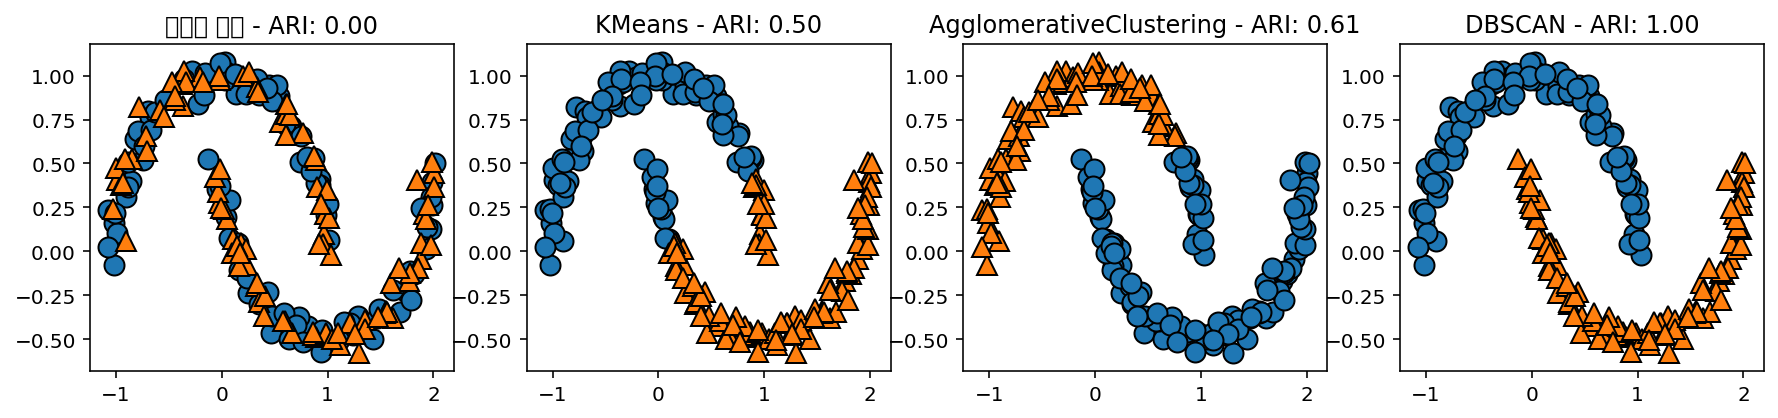

In [53]:
from sklearn.metrics.cluster import adjusted_rand_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 군집 평가 시각화
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(0, 2, size=len(X))

# 무작위 할당한 클러스터를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], random_cluster, ax=axes[0])
score = adjusted_rand_score(y, random_cluster)
axes[0].set_title(f'무작위 할당 - ARI: {score:.2f}')

# 사용할 알고리즘 모델을 리스트로 만듦
models = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 클러스터 할당과 클러스터 중심을 시각화
for ax, model in zip(axes[1:], models):
  model.fit(X_scaled)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, ax=ax)
  score = adjusted_rand_score(y, model.labels_)
  ax.set_title(f'{model.__class__.__name__} - ARI: {score:.2f}')

plt.show()

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 ARI 점수 비교


In [55]:
# 주의!! 예측정확도가 아닌 군집용 측정도구(ARI)를 이용
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
print('정확도:', accuracy_score(clusters1, clusters2))
print('ARI:', adjusted_rand_score(clusters1, clusters2))

정확도: 0.0
ARI: 1.0


- 군집용 측정 도구를 이용
 - adjusted_rand_score()
 - normalized_mutual_info_score()

- 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제 레이블 이름과 맞는지 확인
- 클러스터 레이블은 그 자체로 의미가 있는 것이 아니며 포인트들이 같은 클러스터에 속해 있는가만이 중요

#### 타겟값 없이 군집 평가

실루엣 분석(silhouette analysis)


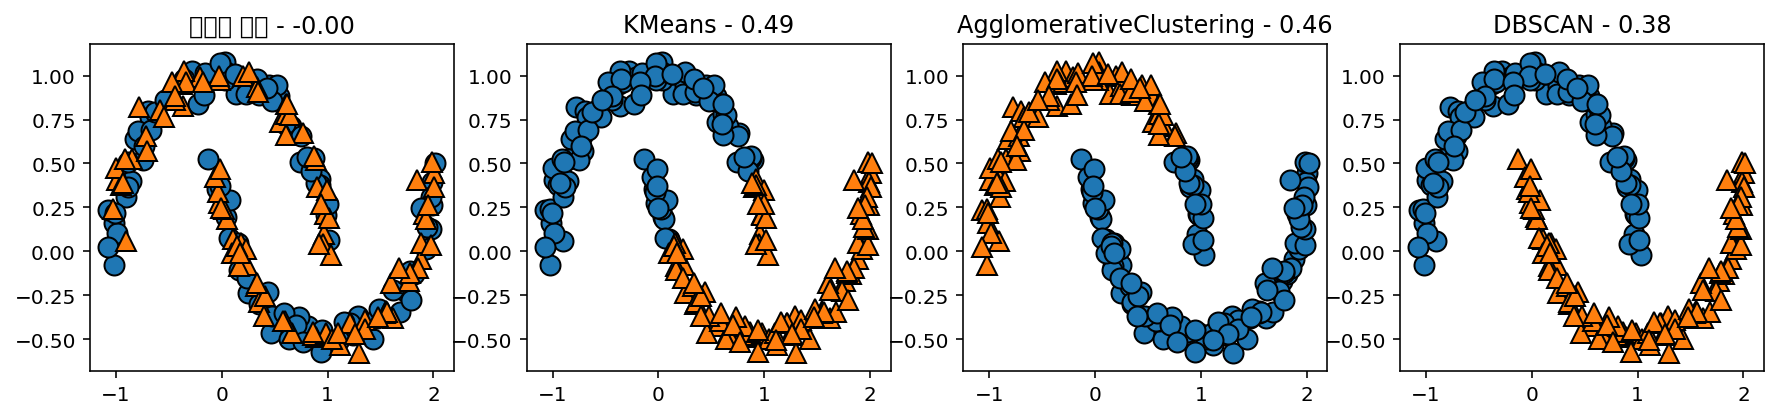

In [56]:
from sklearn.metrics.cluster import silhouette_score

# two_moons 데이터를 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
X_scaled = StandardScaler().fit_transform(X)

# 군집 평가 시각화
fig, axes = plt.subplots(1, 4, figsize=(15, 3) )

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(0, 2, size=len(X))

# 무작위 할당한 클러스터를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], random_cluster, ax=axes[0])
score = silhouette_score(X, random_cluster)
axes[0].set_title(f'무작위 할당 - {score:.2f}')

# 사용할 알고리즘 모델을 리스트로 만듦
models = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 클러스터 할당과 클러스터 시각화
for ax, model in zip(axes[1:], models):
  model.fit(X_scaled)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, ax=ax)
  score = silhouette_score(X_scaled, model.labels_)
  ax.set_title(f'{model.__class__.__name__} - {score:.2f}')

plt.show()

- two_moons 데이터셋에 적용한 무작위 할당, K-means, 병합군집, DBSCAN의 실루엣 점수 비교

- 더 나은 군집을 만든 DBSCAN의 실루엣 점수가 K-means 보다 낮음 (낮은 신뢰도)